# Map network test

In [1]:
using Flux

In [105]:
layer1 = Chain(Dense(1,4),Dense(4,1))

Chain(Dense(1, 4), Dense(4, 1))

In [4]:
params(layer1)

Params([Float32[-0.25372472; -0.62047327; -1.0928491; 0.64892745], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.74014366 -0.050809667 -0.9748437 0.996483], Float32[0.0]])

In [22]:
layer2 = Chain(Chain(Dense(1,4),Dense(4,4)),Dense(4,1))

Chain(Chain(Dense(1, 4), Dense(4, 4)), Dense(4, 1))

In [25]:
Flux.trainable(layer2)

(Chain(Dense(1, 4), Dense(4, 4)), Dense(4, 1))

In [57]:
struct MapIn7{T<:Tuple}
    layers::T
    MapIn7(xs...) = new{typeof(xs)}(xs)
end
function Base.show(io::IO, c::MapIn7)
  print(io, "MapIn(")
  join(io, c.layers, ", ")
  print(io, ")")
end
(a::MapIn7)(x) = broadcast(a.layers[1], x)

In [106]:
mapInTestLayer7 = MapIn7(layer1)

MapIn(Chain(Dense(1, 4), Dense(4, 1)))

In [6]:
dump(mapInTestLayer7)

MapIn7{Tuple{Chain{Tuple{Dense{typeof(identity),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}}}}}
  layers: Tuple{Chain{Tuple{Dense{typeof(identity),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}}}}
    1: Chain{Tuple{Dense{typeof(identity),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}}}
      layers: Tuple{Dense{typeof(identity),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}}
        1: Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}
          W: Array{Float32}((4, 1)) Float32[-0.25372472; -0.62047327; -1.0928491; 0.64892745]
          b: Array{Float32}((4,)) Float32[0.0, 0.0, 0.0, 0.0]
          σ: identity (function of type typeof(identity))
        2: Dense{typeof(identity),Array{Float32,2},Array{Float32,1}}
          W: Array{Float32}((1, 4)) Float32[0.74014366 -0.050809667 -0.9748437 0.9

In [63]:
Flux.trainable(a::MapIn7) = a.layers[1]

(Chain(Dense(1, 4), Dense(4, 1)),)

In [28]:
Flux.trainable(mapInTestLayer7.layers)

(Chain(Dense(1, 4), Dense(4, 1)),)

In [29]:
Flux.trainable(mapInTestLayer7)

(Chain(Dense(1, 4), Dense(4, 1)),)

In [99]:
params(mapInTestLayer7)

Params([Float32[0.88460606; 0.9629422; 0.7789683; -1.0123527], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.7429254 0.5973324 0.467775 0.029173711], Float32[0.0]])

In [103]:
layer1([0.1])

1-element Array{Float32,1}:
 0.15557355

In [107]:
mapInTestLayer7.layers[1]([0.2])

1-element Array{Float32,1}:
 0.10786706

In [108]:
mapInTestLayer7([[0.1],[0.2]])

2-element Array{Array{Float32,1},1}:
 [0.05393353]
 [0.10786706]

In [88]:
struct MapIn6{T<:Tuple}
    layers::T
    MapIn6(xs...) = new{typeof(xs)}(xs)
end
function Base.show(io::IO, c::MapIn6)
  print(io, "MapIn(")
  join(io, c.layers, ", ")
  print(io, ")")
end
applychain(::Tuple{}, x) = x
applychain(fs::Tuple, x) = applychain(Base.tail(fs), first(fs)(x))
(a::MapIn6)(x) = broadcast(y -> applychain(a.layers, y), x)

In [102]:
mapInTestLayer7 = MapIn7(Dense(1,4),Dense(4,1))
mapInTestLayer6 = MapIn6(Dense(1,4),Dense(4,1))

MapIn(Dense(1, 4), Dense(4, 1))

In [95]:
mapInTestLayer6([[0.1]])

1-element Array{Array{Float32,1},1}:
 [0.15775701]

In [97]:
mapInTestLayer6([[0.1],[0.2]])

2-element Array{Array{Float32,1},1}:
 [0.15775701]
 [0.31551403]

In [114]:
Flux.trainable(mapInTestLayer6)

()

In [118]:
Flux.trainable(a::MapIn6) = a.layers

In [119]:
Flux.trainable(mapInTestLayer6)

(Dense(1, 4), Dense(4, 1))

In [120]:
params(mapInTestLayer6)

Params([Float32[-0.93995047; 0.37457904; 0.89388585; -1.0370347], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.6878967 0.810748 0.81012404 -0.95457655], Float32[0.0]])

In [158]:
mapInTestLayer6([[0.1],[0.2]])

2-element Array{Array{Float32,1},1}:
 [0.13711879]
 [0.27423757]

In [190]:
#(a::MapIn6)(x::Array{Float32,1}) = a(map(y -> [y], x))
(a::MapIn6)(x::Array{Float32,1}) = broadcast(first, a(map(y -> [y], x)))
mapInTestLayer6([Float32(0.1), Float32(0.2)])

2-element Array{Float32,1}:
 0.13711879
 0.27423757

In [191]:
println(typeof([[0.1],[0.2]]))
println(typeof([0.1, 0.2]))
println(typeof([Float32(0.1), Float32(0.2)]))

Array{Array{Float64,1},1}
Array{Float64,1}
Array{Float32,1}


## Training test

In [954]:
using Plots
pyplot();

In [955]:
struct MapIn{T<:Tuple}
    layers::T
    MapIn(xs...) = new{typeof(xs)}(xs)
end
applychain(::Tuple{}, x) = x
applychain(fs::Tuple, x) = applychain(Base.tail(fs), first(fs)(x))
(a::MapIn)(x) = broadcast(y -> applychain(a.layers, y), x)
(a::MapIn)(x::Array{Float32,1}) = broadcast(first, a(map(y -> [y], x)))
Flux.trainable(a::MapIn) = a.layers

In [956]:
function trueTemperatureFun(t::Real)
  intc = Float32(100)
  midp = Float32(50)
  grad = Float32(8/5)
  Float32(intc - grad*abs(t - midp))
end
function range32(start::Real, stop::Real, step::Real)
  # Float32 type StepRangeLen
  res = range(Float32(start), stop=Float32(stop), step = Float32(step))
  return StepRangeLen{Float32,Float32,Float32}(res)
end;

In [957]:
tDomain = Float32[0.1, 5.3, 15.5, 25.5, 39.9, 45.3, 55.5, 65.5, 89.9, 99.5]
tempData = trueTemperatureFun.(tDomain)

10-element Array{Float32,1}:
 20.159996
 28.479996
 44.8
 60.8
 83.840004
 92.479996
 91.2
 75.2
 36.159996
 20.799995

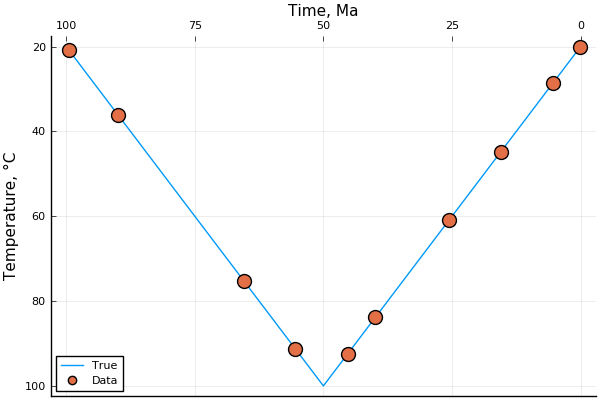

In [958]:
tforPlot = collect(range32(0, 100, 0.1))
trueTemperature = trueTemperatureFun.(tforPlot)
  plot(tforPlot, trueTemperature,
    label = "True",
    xmirror=true)
  scatter!(tDomain, tempData, markersize = 10, label = "Data")
  plot!(xaxis = ("Time, Ma", :flip))
  plot!(yaxis = ("Temperature, °C", :flip))

#### Making network

In [959]:
#data = [(tDomain, tempData)]
data = Iterators.repeated((tDomain, tempData), 10000)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Array{Float32,1},Array{Float32,1}}}}(Base.Iterators.Repeated{Tuple{Array{Float32,1},Array{Float32,1}}}((Float32[0.1, 5.3, 15.5, 25.5, 39.9, 45.3, 55.5, 65.5, 89.9, 99.5], Float32[20.159996, 28.479996, 44.8, 60.8, 83.840004, 92.479996, 91.2, 75.2, 36.159996, 20.799995])), 10000)

In [960]:
temperatureNet = Chain(
    Dense(1, 16, gelu),
    Dense(16, 32, gelu),
    Dense(32, 64),
    +)
temperatureMap = MapIn(temperatureNet)
typeof(temperatureMap)

MapIn{Tuple{Chain{Tuple{Dense{typeof(gelu),Array{Float32,2},Array{Float32,1}},Dense{typeof(gelu),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}},typeof(+)}}}}

In [961]:
p, re = Flux.destructure(temperatureNet)
p[p.!=0.0] = Float32.(0.5*randn(sum(p.!=0.0)))
p[p.==0.0] = (50.0 .+ Float32.(10.0*randn(sum(p.==0.0))))
temperatureNet = re(p)
temperatureMap = MapIn(temperatureNet)

MapIn{Tuple{Chain{Tuple{Dense{typeof(gelu),Array{Float32,2},Array{Float32,1}},Dense{typeof(gelu),Array{Float32,2},Array{Float32,1}},Dense{typeof(identity),Array{Float32,2},Array{Float32,1}},typeof(+)}}}}((Chain(Dense(1, 16, gelu), Dense(16, 32, gelu), Dense(32, 64), +),))

In [962]:
initialEstAll = temperatureMap(tforPlot)
initialEst = temperatureMap(tDomain)

10-element Array{Float32,1}:
 399.1277
 400.02893
 405.3698
 401.78198
 386.585
 384.1199
 378.9524
 382.8756
 384.6387
 385.38446

In [963]:
parameters = params(temperatureMap)

Params([Float32[0.5587507; 0.2188728; … ; -0.34791917; 0.23133956], Float32[48.663906, 55.21605, 43.642014, 49.838047, 73.65458, 49.794823, 46.44229, 55.091885, 61.08917, 58.82878, 42.110092, 30.231644, 40.709755, 58.78464, 44.83268, 44.001152], Float32[0.21515167 0.4047362 … -0.46685985 -0.39038825; -1.1651766 0.398652 … 0.09785674 -0.28344733; … ; -0.17807537 0.37975794 … 0.5490764 -0.5740986; -0.78768134 -0.7537169 … -0.13597544 -0.15581346], Float32[33.92811, 64.33731, 54.760574, 47.6862, 57.638374, 65.48528, 45.816395, 34.100388, 40.92769, 48.541977  …  66.825615, 43.25918, 59.391125, 51.24578, 43.455963, 41.2851, 58.052746, 45.98208, 68.3352, 65.57631], Float32[-0.34919986 1.015037 … -0.054300837 0.5711686; 0.6096355 -0.29614767 … -0.074211955 0.011038453; … ; -0.17847337 -0.11879905 … -0.041883867 -0.65088016; 0.3232529 0.5583725 … -0.079841435 -0.075224265], Float32[56.03857, 43.07161, 48.40487, 50.49785, 47.751465, 50.139053, 29.805407, 41.525, 48.108967, 52.278843  …  37.8253

In [964]:
loss(x, y) = Flux.mae(temperatureMap(x), y)

loss (generic function with 1 method)

In [965]:
Flux.mae(tempData, tempData)

0.0f0

In [966]:
opt = ADAM(0.01)
evalcb = () -> println(loss(data.xs.x...))

#190 (generic function with 1 method)

In [967]:
Flux.train!(loss, parameters, data, opt, cb = Flux.throttle(evalcb, 1))

231.65453
3.6557662
4.7021556
2.4573953
0.95882076
1.0155915
0.3720928
0.49902764
1.0618908
1.1456766
1.0263716


In [968]:
finalEstAll = temperatureMap(tforPlot)
finalEst = temperatureMap(tDomain)

10-element Array{Float32,1}:
 19.656494
 28.054422
 44.529778
 60.681976
 83.94167
 92.53023
 90.94135
 74.811104
 35.734818
 21.12149

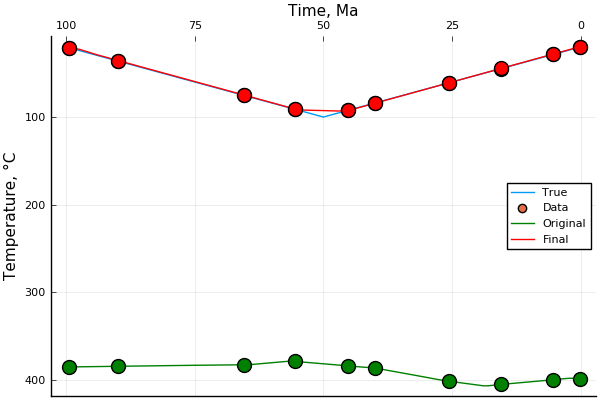

In [969]:
plot(tforPlot, trueTemperature,
    label = "True",
    xmirror=true)
scatter!(tDomain, tempData, markersize = 10, label = "Data")
plot!(tforPlot, initialEstAll, color = "green", label = "Original")
scatter!(tDomain, initialEst, markersize = 10, color = "green", label = "")
plot!(tforPlot, finalEstAll, color = "red", label = "Final")
scatter!(tDomain, finalEst, markersize = 10, color = "red", label = "")
plot!(xaxis = ("Time, Ma", :flip))
plot!(yaxis = ("Temperature, °C", :flip))